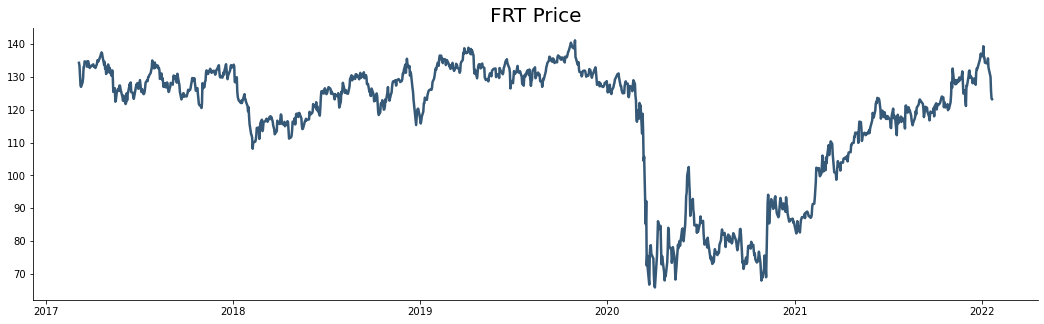

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('FRT.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('FRT Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,FRT
Date,
2017-03-06,134.30
2017-03-07,133.39
2017-03-08,130.50
2017-03-09,127.44
2017-03-10,126.98
...,...
2022-01-14,132.86
2022-01-18,130.02
2022-01-19,125.62


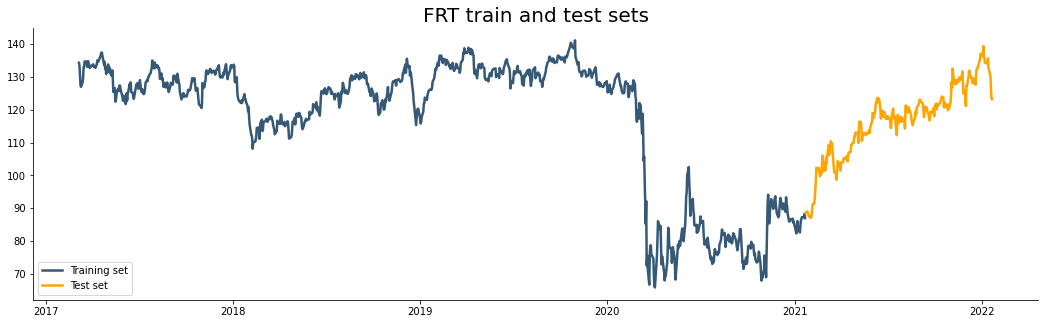

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('FRT train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,FRT
Date,
2017-03-06,134.30
2017-03-07,133.39
2017-03-08,130.50
2017-03-09,127.44
2017-03-10,126.98
...,...
2021-01-14,86.78
2021-01-15,87.27
2021-01-19,87.20


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,FRT
Date,
2021-01-22,88.53
2021-01-25,88.96
2021-01-26,88.78
2021-01-27,88.30
2021-01-28,87.58
...,...
2022-01-14,132.86
2022-01-18,130.02
2022-01-19,125.62


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'FRT': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'FRT': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,134.30
1,2017-03-07,133.39
2,2017-03-08,130.50
3,2017-03-09,127.44
4,2017-03-10,126.98


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,47.013153,-109.276525,216.177900,-118.976235,209.775224,9.226559,9.226559,9.226559,3.465918,...,0.112478,0.112478,0.112478,5.648163,5.648163,5.648163,0.0,0.0,0.0,56.239712
755,2023-02-16,46.977569,-108.488778,219.297532,-119.269707,210.281887,9.462097,9.462097,9.462097,3.465918,...,0.196795,0.196795,0.196795,5.799385,5.799385,5.799385,0.0,0.0,0.0,56.439667
756,2023-02-17,46.941986,-107.411286,220.981226,-119.563178,210.788550,9.450522,9.450522,9.450522,3.465918,...,0.035271,0.035271,0.035271,5.949333,5.949333,5.949333,0.0,0.0,0.0,56.392508
757,2023-02-18,46.906402,-113.331256,221.354375,-119.856650,211.295214,9.125518,9.125518,9.125518,3.465918,...,-0.433240,-0.433240,-0.433240,6.092840,6.092840,6.092840,0.0,0.0,0.0,56.031920
758,2023-02-19,46.870818,-112.151415,220.728021,-120.150121,211.799093,9.257136,9.257136,9.257136,3.465918,...,-0.433240,-0.433240,-0.433240,6.224457,6.224457,6.224457,0.0,0.0,0.0,56.127954


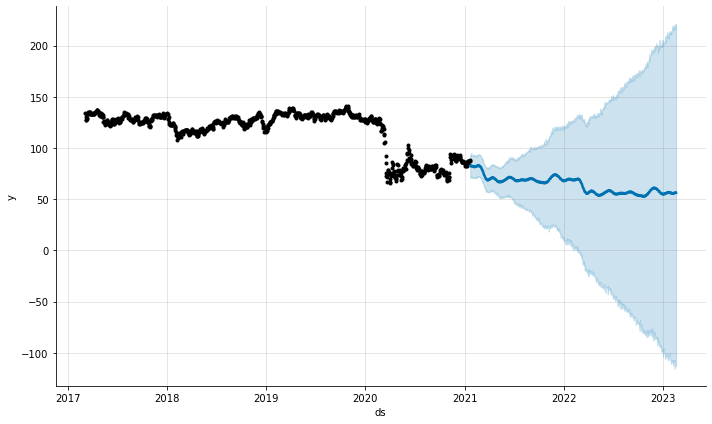

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

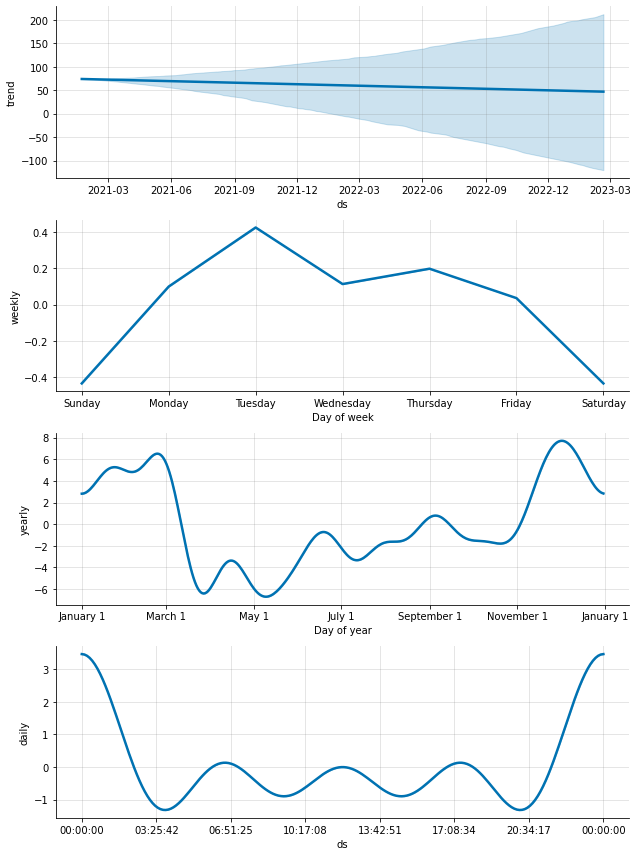

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,FRT,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,88.53,2021-01-22,73.843255,72.382610,93.060505,73.843255,73.843255,8.743367,8.743367,...,0.035271,0.035271,0.035271,5.242178,5.242178,5.242178,0.0,0.0,0.0,82.586623
1,2021-01-25,88.96,2021-01-25,73.736504,72.050046,92.858924,73.736504,73.768407,8.827032,8.827032,...,0.098737,0.098737,0.098737,5.262377,5.262377,5.262377,0.0,0.0,0.0,82.563536
2,2021-01-26,88.78,2021-01-26,73.700921,71.991849,93.679012,73.699250,73.757917,9.126386,9.126386,...,0.423200,0.423200,0.423200,5.237268,5.237268,5.237268,0.0,0.0,0.0,82.827307
3,2021-01-27,88.30,2021-01-27,73.665337,71.654911,93.402729,73.639038,73.765578,8.778259,8.778259,...,0.112478,0.112478,0.112478,5.199863,5.199863,5.199863,0.0,0.0,0.0,82.443596
4,2021-01-28,87.58,2021-01-28,73.629753,72.072955,92.721596,73.579957,73.790474,8.815649,8.815649,...,0.196795,0.196795,0.196795,5.152936,5.152936,5.152936,0.0,0.0,0.0,82.445402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,132.86,2022-01-14,61.139878,10.912708,128.860745,6.456653,119.515752,7.857203,7.857203,...,0.035271,0.035271,0.035271,4.356014,4.356014,4.356014,0.0,0.0,0.0,68.997081
249,2022-01-18,130.02,2022-01-18,60.997543,13.909512,132.327230,5.521750,120.273867,8.814130,8.814130,...,0.423200,0.423200,0.423200,4.925012,4.925012,4.925012,0.0,0.0,0.0,69.811673
250,2022-01-19,125.62,2022-01-19,60.961960,9.687214,132.301167,5.288024,120.463396,8.608600,8.608600,...,0.112478,0.112478,0.112478,5.030204,5.030204,5.030204,0.0,0.0,0.0,69.570559
251,2022-01-20,123.40,2022-01-20,60.926376,9.455728,130.629080,5.054298,120.646461,8.779815,8.779815,...,0.196795,0.196795,0.196795,5.117103,5.117103,5.117103,0.0,0.0,0.0,69.706191


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,73.843255,72.028909,93.142497,73.843255,73.843255,8.743367,8.743367,8.743367,3.465918,...,0.035271,0.035271,0.035271,5.242178,5.242178,5.242178,0.0,0.0,0.0,82.586623
1,2021-01-23,73.807672,70.588114,93.414542,73.807672,73.807672,8.299225,8.299225,8.299225,3.465918,...,-0.433240,-0.433240,-0.433240,5.266547,5.266547,5.266547,0.0,0.0,0.0,82.106897
2,2021-01-24,73.772088,71.473444,92.225955,73.772088,73.775516,8.305468,8.305468,8.305468,3.465918,...,-0.433240,-0.433240,-0.433240,5.272790,5.272790,5.272790,0.0,0.0,0.0,82.077556
3,2021-01-25,73.736504,71.932497,92.846426,73.726915,73.748375,8.827032,8.827032,8.827032,3.465918,...,0.098737,0.098737,0.098737,5.262377,5.262377,5.262377,0.0,0.0,0.0,82.563536
4,2021-01-26,73.700921,72.397950,95.375467,73.680031,73.733510,9.126386,9.126386,9.126386,3.465918,...,0.423200,0.423200,0.423200,5.237268,5.237268,5.237268,0.0,0.0,0.0,82.827307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,47.013153,-109.276525,216.177900,-118.976235,209.775224,9.226559,9.226559,9.226559,3.465918,...,0.112478,0.112478,0.112478,5.648163,5.648163,5.648163,0.0,0.0,0.0,56.239712
755,2023-02-16,46.977569,-108.488778,219.297532,-119.269707,210.281887,9.462097,9.462097,9.462097,3.465918,...,0.196795,0.196795,0.196795,5.799385,5.799385,5.799385,0.0,0.0,0.0,56.439667
756,2023-02-17,46.941986,-107.411286,220.981226,-119.563178,210.788550,9.450522,9.450522,9.450522,3.465918,...,0.035271,0.035271,0.035271,5.949333,5.949333,5.949333,0.0,0.0,0.0,56.392508
757,2023-02-18,46.906402,-113.331256,221.354375,-119.856650,211.295214,9.125518,9.125518,9.125518,3.465918,...,-0.433240,-0.433240,-0.433240,6.092840,6.092840,6.092840,0.0,0.0,0.0,56.031920


In [26]:
mean_squared_error(df_test.FRT,df_test.yhat,squared=False)

47.79381517945359

In [12]:
ROI = (46.870818/123.22)*100-100
ROI

-61.96167992209057